# Honey Production

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [5]:
df = pd.read_csv("data/honeyproduction.csv")
df.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [6]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [7]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)

In [8]:
y = prod_per_year['totalprod']

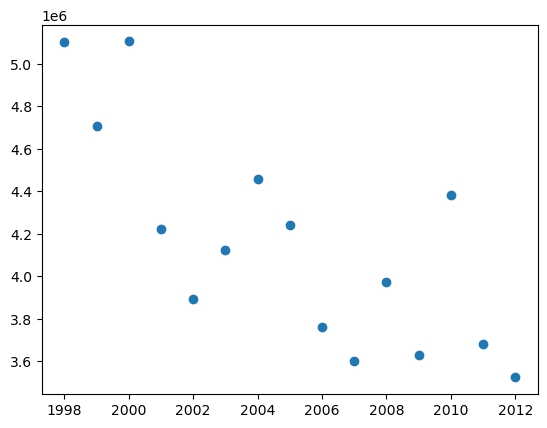

In [9]:
# y vs. X as a scatterplot

plt.scatter(X, y)
plt.show()

### Create and fit the linear regression model

In [10]:
regr = linear_model.LinearRegression()

In [11]:
regr.fit(X, y)

LinearRegression()

In [12]:
print(F"The slope of the line is {regr.coef_[0]}\nThe intercept is {regr.intercept_}")

The slope of the line is -88303.18915238195
The intercept is 181208083.10732982


In [13]:
y_predict = regr.predict(X)

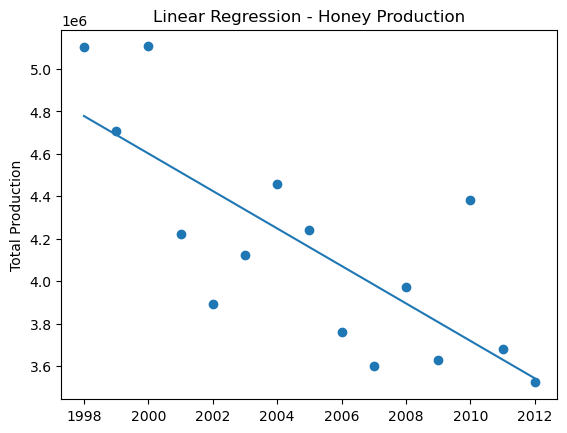

In [14]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.title("Linear Regression - Honey Production")
plt.ylabel("Total Production")
plt.show()

### Predict the Honey Decline

What will it look like in 2050?

In [15]:
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1, 1)

In [16]:
future_predict = regr.predict(X_future)

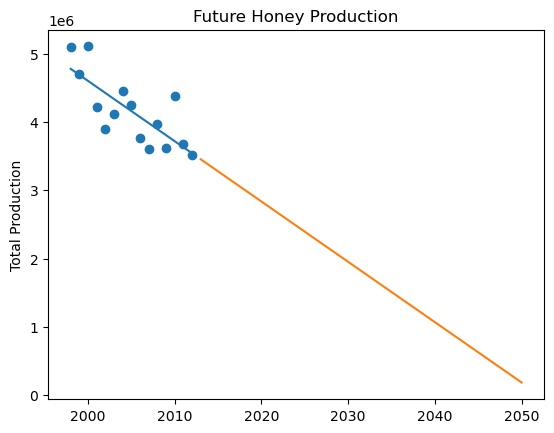

In [17]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.title("Future Honey Production")
plt.ylabel("Total Production")
plt.show()